In [1]:
##CONSTRUCTION MODEL FOR PINHIBENS DSM17395

#importing packages
from cobra.io import read_sbml_model, write_sbml_model, save_json_model
import numpy as np

In [2]:
#creating model from NCBI database
!carve --fbc2 --refseq GCF_000154765.2 -o pinhibens_DSM17395.xml
model = read_sbml_model('pinhibens_DSM17395.xml')

diamond v2.0.13.151 (C) Max Planck Society for the Advancement of Science
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: 
Percentage range of top alignment score to report hits: 10
Opening the database...  [0.058s]
Database: c:\users\pol\anaconda3\envs\project\lib\site-packages\carveme/data/generated/bigg_proteins.dmnd (type: Diamond database, sequences: 26727, letters: 11170577)
Block size = 2000000000
Opening the input file...  [0.028s]
Opening the output file...  [0s]
Loading query sequences...  [0.008s]
Masking queries...  [0.03s]
Algorithm: Double-indexed
Building query histograms...  [0.043s]
Allocating buffers...  [0s]
Loading reference sequences...  [0.018s]
Masking reference...  [0.169s]
Initializing temporary storage...  [0.022s]
Building reference histogram

File exists, skipping.


Computing hash join...  [0.008s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.013s]
Processing query block 1, reference block 1/1, shape 4/16, index chunk 1/4.
Building reference seed array...  [0.046s]
Building query seed array...  [0.007s]
Computing hash join...  [0.011s]
Masking low complexity seeds...  [0.002s]
Searching alignments...  [0.014s]
Processing query block 1, reference block 1/1, shape 4/16, index chunk 2/4.
Building reference seed array...  [0.042s]
Building query seed array...  [0.008s]
Computing hash join...  [0.009s]
Masking low complexity seeds...  [0.002s]
Searching alignments...  [0.015s]
Processing query block 1, reference block 1/1, shape 4/16, index chunk 3/4.
Building reference seed array...  [0.045s]
Building query seed array...  [0.008s]
Computing hash join...  [0.008s]
Masking low complexity seeds...  [0.002s]
Searching alignments...  [0.015s]
Processing query block 1, reference block 1/1, shape 4/16, index chunk 4/4.
Building refer

In [3]:
#gap filling the model with rich medium (LB)

In [4]:
%%time
!carve --refseq GCF_000154765.2 --output pinhibens_DSM17395_LB.xml --gapfill LB --init LB

File exists, skipping.
Wall time: 35.4 s


diamond v2.0.13.151 (C) Max Planck Society for the Advancement of Science
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: 
Percentage range of top alignment score to report hits: 10
Opening the database...  [0.032s]
Database: c:\users\pol\anaconda3\envs\project\lib\site-packages\carveme/data/generated/bigg_proteins.dmnd (type: Diamond database, sequences: 26727, letters: 11170577)
Block size = 2000000000
Opening the input file...  [0.021s]
Opening the output file...  [0s]
Loading query sequences...  [0.007s]
Masking queries...  [0.023s]
Algorithm: Double-indexed
Building query histograms...  [0.047s]
Allocating buffers...  [0s]
Loading reference sequences...  [0.019s]
Masking reference...  [0.17s]
Initializing temporary storage...  [0.008s]
Building reference histogram

In [5]:
model = read_sbml_model('pinhibens_DSM17395_LB.xml')

In [6]:
#solving problems about the SBML file -it was missing "boundaryCondition="false""
for met in model.metabolites:
    met.boundaryCondition = "false"

In [7]:
#creating new file so the SBML problem is fixed
write_sbml_model(model, "pinhibens_DSM17395_ok.xml")
model = read_sbml_model('pinhibens_DSM17395_ok.xml')

In [8]:
##CONSTRUCTION AND HIGH-LEVEL ANALYSIS OF STOICHIOMETRIC MATRIX (S)

#creating the stoichiometric matrix from the model and cheching how sparse it is:
from cobra.util import create_stoichiometric_matrix

In [9]:
S=create_stoichiometric_matrix(model)
S.shape

(1722, 2563)

In [10]:
nonzeros=np.count_nonzero(S)
zeros=S[np.where(S == 0)].size
percent_nonzeros=(nonzeros/(zeros+nonzeros))*100
print("Number of Zeroes in S -->",zeros)
print("Number of non-Zeroes in S -->",nonzeros)
print("Percentage of non-zero elements in S-->",round(percent_nonzeros,2),"%")

Number of Zeroes in S --> 4402733
Number of non-Zeroes in S --> 10753
Percentage of non-zero elements in S--> 0.24 %


In [11]:
#finding the degrees of freedom (F) of our model
from numpy.linalg import matrix_rank

In [12]:
rank_S=matrix_rank(S, tol=None, hermitian=False)
dimS=S.shape
F=dimS[1]-rank_S
print("Degrees of freedom:",F)

Degrees of freedom: 893


In [13]:
#visualization of stoichiometric matrix (S)

import matplotlib.pyplot as plt

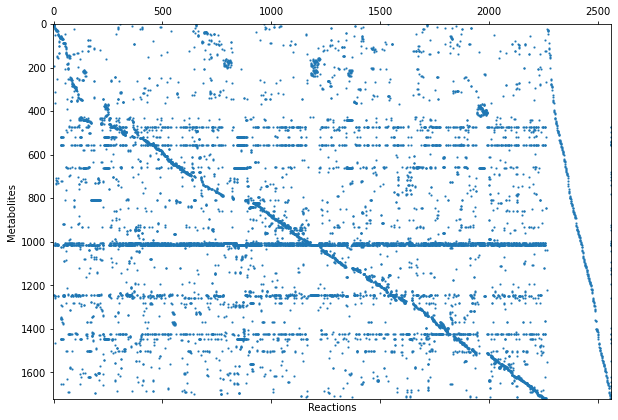

In [14]:
plt.figure(figsize=(10,10))
plt.spy(S, precision=0.01, markersize=1)
plt.xlabel('Reactions')
plt.ylabel('Metabolites')
plt.show()

In [15]:
##COMPUTE REACTION AND COMPOUND ADJACENCY MATRICES

#construction of binary S


In [16]:
Sb=np.where(S!=0,1,S)

In [17]:
#compute the reaction (A_v) and compound (A_x) adjacency matrices

In [18]:
A_v=Sb.T.dot(Sb)


In [19]:
A_x=Sb.dot(Sb.T)

In [20]:
#finding metabolite involved in the largest number of reactions
D_ax=A_x.diagonal()  #We create a new vector that only includes the diagonal information ex. ATP.vs.ATP, etc.

D_ax.max() #We get the maximum value of the diagonal for A_x
D_ax.argmax() #We get the position where the maximum value of A_x is

model.metabolites[D_ax.argmax()]  #we index on the model the position we are interested in

Metabolite identifier,h_c
Name,H+
Memory address,0x019a14689b70
Formula,H
Compartment,C_c
In 1145 reaction(s),"GLUabcpp, TRPabc, GDPDPKE, FAO3, NH4tpp_1, DMGDH2, ZNabcpp, DSERDHr, FAO1, HOXPRx, GDPMNP, GLUabc, CU2abcpp, SPMDabc, FACOALP60t2pp, FDH4pp, LCTSt3ipp, TRSARr, FDMO3, FDMO, GTHRDabcpp, MUCCY_kt,..."


In [21]:
#extracting the top10 most connected metabolites of the model:
connectivity = sorted(zip(model.metabolites, A_x.diagonal()), key=lambda item: item[1], reverse=True)
connectivity[0:10]

topconnect=connectivity[0:10]

u=0
topelements=[]
for element in topconnect:
    topelements.append(topconnect[u][0].id) #Loop gives me the id for each element of topconnect list, and it adds it to u.
    u=u+1 #append means "add afterwards"
print("Top10 connected metabolites:", topelements)

Top10 connected metabolites: ['h_c', 'h2o_c', 'atp_c', 'pi_c', 'adp_c', 'coa_c', 'nad_c', 'nadh_c', 'ppi_c', 'h_p']


In [22]:
#finding the reactions involved with the metabolite "10fthf_c":

listr=list(model.metabolites.get_by_id('10fthf_c').reactions)

In [23]:
u=0
ids=[]
for element in listr:
    ids.append(listr[u].id)
    u=u+1 #append means "add afterwards"

print("Reactions involved with 10fthf_c:",ids)

Reactions involved with 10fthf_c: ['GARFT', 'AICART', 'MTHFC', 'FTHFLi', 'Growth']


In [24]:
##GENERATE NETWORKS FROM THE ADJACENCY MATRICES
import networkx as nx

In [25]:
#create a metablolite (A_x) centric network
compound_centric_network = nx.from_numpy_matrix(A_x)

In [26]:
mapping = dict(zip(range(0, len(model.metabolites)), model.metabolites)) #naming the nodes in the network after the metabolites in the model
compound_centric_network = nx.relabel_nodes(compound_centric_network, mapping)

In [27]:
#finding the number of connections (degree) each node (compound) has
metabolite_degrees = compound_centric_network.degree()

In [28]:
sorted_metabolite_degrees = sorted(metabolite_degrees, key=lambda item: item[1], reverse=True)
sorted_metabolite_degrees[0:10]

[(<Metabolite h_c at 0x19a14689b70>, 1301),
 (<Metabolite h2o_c at 0x19a1433fe10>, 1035),
 (<Metabolite atp_c at 0x19a1633f0b8>, 723),
 (<Metabolite pi_c at 0x19a13bb9d68>, 605),
 (<Metabolite adp_c at 0x19a163d2ef0>, 567),
 (<Metabolite nad_c at 0x19a140187b8>, 361),
 (<Metabolite ppi_c at 0x19a13a7c5f8>, 331),
 (<Metabolite nadh_c at 0x19a14018668>, 326),
 (<Metabolite coa_c at 0x19a162b29b0>, 315),
 (<Metabolite h_p at 0x19a144abda0>, 272)]

In [29]:
#FIND REACTION
print(model.objective)

Maximize
1.0*Growth - 1.0*Growth_reverse_699ae


In [30]:
model.reactions.Growth.metabolites

{<Metabolite 10fthf_c at 0x7f96728286a0>: -0.000223,
 <Metabolite ala__L_c at 0x7f967291c070>: -0.513689,
 <Metabolite amet_c at 0x7f96729209a0>: -0.000223,
 <Metabolite arg__L_c at 0x7f9672920df0>: -0.295792,
 <Metabolite asn__L_c at 0x7f9672920fa0>: -0.241055,
 <Metabolite asp__L_c at 0x7f96729249d0>: -0.241055,
 <Metabolite atp_c at 0x7f9672924c10>: -54.124831,
 <Metabolite ca2_c at 0x7f96729266a0>: -0.005205,
 <Metabolite cl_c at 0x7f967292a280>: -0.005205,
 <Metabolite coa_c at 0x7f967292aee0>: -0.000576,
 <Metabolite cobalt2_c at 0x7f967292af10>: -0.0001,
 <Metabolite ctp_c at 0x7f967292f760>: -0.133508,
 <Metabolite cu2_c at 0x7f967292f7c0>: -0.000709,
 <Metabolite cys__L_c at 0x7f967292fb80>: -0.09158,
 <Metabolite datp_c at 0x7f967292f820>: -0.026166,
 <Metabolite dctp_c at 0x7f96729325e0>: -0.027017,
 <Metabolite dgtp_c at 0x7f9672932d60>: -0.027017,
 <Metabolite dttp_c at 0x7f9672935bb0>: -0.026166,
 <Metabolite fad_c at 0x7f96729394f0>: -0.000223,
 <Metabolite fe2_c at 0x7f

In [31]:
write_sbml_model(model, "ok_model.xml")

In [32]:
#DRAWING OF THE PATHWAY OF CENTAL CARBON METABOLISM

In [33]:
copy_model=model

In [34]:
copy_model.optimize()

,fluxes,reduced_costs
12DGR140tipp,0.000000,0.000000e+00
12DGR160tipp,0.000000,0.000000e+00
12DGR180tipp,0.000000,0.000000e+00
12DGR181tipp,0.000000,0.000000e+00
13PPDH,0.000000,1.734723e-18
...,...,...
EX_xyl__D_e,0.000000,0.000000e+00
EX_zn2_e,-0.000242,0.000000e+00
Growth,0.708784,7.355228e-16
ATPM,0.000000,-2.858959e-02


In [35]:
copy_model.optimize().objective_value

0.7087835138069689

In [36]:
solution=copy_model.optimize()

In [37]:
solution.fluxes

12DGR140tipp    0.000000
12DGR160tipp    0.000000
12DGR180tipp    0.000000
12DGR181tipp    0.000000
13PPDH          0.000000
                  ...   
EX_xyl__D_e     0.000000
EX_zn2_e       -0.000242
Growth          0.708784
ATPM            0.000000
ASNS2           0.170856
Name: fluxes, Length: 2563, dtype: float64

In [38]:
solution.fluxes[solution.fluxes != 0.] #finding the non-zero fluxes

2S6HCCi        7.087835e-05
AACOAR_syn     7.494005e-16
ABTA           2.220446e-15
ACALD         -2.811527e+00
ACALDt        -2.811935e+00
                   ...     
EX_trp__L_e   -4.028938e-02
EX_tyr__L_e   -9.773841e-02
EX_zn2_e      -2.416952e-04
Growth         7.087835e-01
ASNS2          1.708558e-01
Name: fluxes, Length: 304, dtype: float64

In [39]:
save_json_model(model, "pinhibens_DSM17395_ok_2.json")

In [40]:
import escher
from escher import Builder
import cobra
from time import sleep

In [41]:
builder = Builder(
    model_json='pinhibens_DSM17395_ok_2.json'
)

In [42]:
print (builder) #on "Map" select "load map JSON" and then look for the file "Central metabolism.json"

Builder()


In [43]:
#first we will make a copy_model using GM as a medium
#secondly we will set the glucose uptake to 0.13
#thirdly we will check the O2, CO2 and growth rates to check if data matches.

In [29]:
#Search engine:
search1=input("What do you want to look for: reactions or  metabolites?\n Type in 'Reactions' or 'Metabolites'.\n")
search2=input("Are you looking for a formula? Y/N \n")
search3=input("Search for (case sensitive):\n")
found1=False
if search1=="Metabolites":
        for metabolite in model.metabolites:
            if search2=="N":
                if search3 in metabolite.name:
                    print("ID:",metabolite.id,"Name:",metabolite.name,"Formula:",metabolite.formula)
                    found1=True
                elif search3 in metabolite.id:
                    print("ID:",metabolite.id,"Name:",metabolite.name,"Formula:",metabolite.formula)
                    found1=True
            if search2=="Y":
                if search3 in metabolite.formula:
                    print("Formula:",metabolite.formula,"ID:",metabolite.id,"Name:",metabolite.name)
                    found1=True
elif search1=="Reactions":
        for reaction in model.reactions:
            if search3 in reaction.name:
                print("ID:",reaction.id,"Name:",reaction.name)
                found1=True
            elif search3 in reaction.id:
                print("ID:",reaction.id,"Name:",reaction.name)
                found1=True
if found1==False:
    print("Not found in model. Tip: Python is case sensitive.")
    print("Not found in model. Tip: Python is case sensitive.")

What do you want to look for: reactions or  metabolites?
 Type in 'Reactions' or 'Metabolites'.
Metabolites
Are you looking for a formula? Y/N 
N
Search for (case sensitive):
N-acetyl
ID: acmum6p_c Name: N-acetylmuramate 6-phosphate Formula: C11H17NO11P
ID: uaagmda_c Name: Undecaprenyl-diphospho-N-acetylmuramoyl-(N-acetylglucosamine)-L-ala-D-glu-meso-2,6-diaminopimeloyl-D-ala-D-ala Formula: C95H153N8O28P2
ID: uaccg_c Name: UDP-N-acetyl-3-O-(1-carboxyvinyl)-D-glucosamine Formula: C20H26N3O19P2
ID: uacgam_c Name: UDP-N-acetyl-D-glucosamine Formula: C17H25N3O17P2
ID: uagmda_c Name: Undecaprenyl-diphospho-N-acetylmuramoyl-L-alanyl-D-glutamyl-meso-2,6-diaminopimeloyl-D-alanyl-D-alanine Formula: C87H140N7O23P2
ID: uama_c Name: UDP-N-acetylmuramoyl-L-alanine Formula: C23H33N4O20P2
ID: uamag_c Name: UDP-N-acetylmuramoyl-L-alanyl-D-glutamate Formula: C28H39N5O23P2
ID: uamr_c Name: UDP-N-acetylmuramate Formula: C20H28N3O19P2
ID: udpacgal_c Name: UDP-N-acetyl-D-galactosamine Formula: C17H25N3O17P

In [59]:
print(model.reactions.Growth)

Growth: 0.000223 10fthf_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 0.0001 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 48.601527 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 0.0001 mql8_c + 0.001831 nad_c + 0.000447 nadp_c + 0.185265 phe__L_c + 0.221055 pro__L_c + 0.000223 pydx5p_c + 0.000223 ribflv_c + 0.215792 ser__L_c + 0.004338 so4_c + 0.000223 thf_c + 0.000223 thmpp_c + 0.253687 thr__L_c + 0.056843 trp__L_c + 0.137896 tyr__L_c + 0.1 uaagmda_c + 0.144104 utp_c + 0.423162 val__L_c + 0.000341 zn2_c --> 53.95 adp_c + 53.

In [30]:
model.exchanges

[<Reaction EX_23camp_e at 0x19a177f80f0>,
 <Reaction EX_23ccmp_e at 0x19a177e0fd0>,
 <Reaction EX_23cgmp_e at 0x19a177f8240>,
 <Reaction EX_23cump_e at 0x19a177f82e8>,
 <Reaction EX_23dappa_e at 0x19a177f8320>,
 <Reaction EX_25dkglcn_e at 0x19a177f83c8>,
 <Reaction EX_2dhglcn_e at 0x19a177f8390>,
 <Reaction EX_2m35mdntha_e at 0x19a177f84e0>,
 <Reaction EX_2mbald_e at 0x19a177f8588>,
 <Reaction EX_2pglyc_e at 0x19a177f8630>,
 <Reaction EX_35dnta_e at 0x19a177f86d8>,
 <Reaction EX_3amp_e at 0x19a177f8780>,
 <Reaction EX_3cmp_e at 0x19a177f8828>,
 <Reaction EX_3h4atb_e at 0x19a177f88d0>,
 <Reaction EX_3mb_e at 0x19a177f8978>,
 <Reaction EX_3ump_e at 0x19a177f8a90>,
 <Reaction EX_4abut_e at 0x19a177f8b38>,
 <Reaction EX_4hba_e at 0x19a177f8ba8>,
 <Reaction EX_4hbald_e at 0x19a177f8d68>,
 <Reaction EX_4hbz_e at 0x19a177f8d30>,
 <Reaction EX_4hphac_e at 0x19a177f8e10>,
 <Reaction EX_4hpro_LT_e at 0x19a177f8eb8>,
 <Reaction EX_4hptn_e at 0x19a177f8ef0>,
 <Reaction EX_4oxptn_e at 0x19a177f8f98

In [45]:
#LOOKING FOR THE ESSENTIAL GENES:

essentiality = {} # all of the genes
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

In [46]:
esn_gene = dict() # essential genes

for (key, value) in essentiality.items():
    if value <= 0:
        esn_gene[key] = value

In [47]:
print(esn_gene)

{<Gene WP_014881300_1 at 0x7f96729be0a0>: 0.0, <Gene WP_014873273_1 at 0x7f96729cabb0>: -4.870489943449431e-16, <Gene WP_014880641_1 at 0x7f96729caca0>: -3.726160203170632e-32, <Gene WP_014879659_1 at 0x7f96729cec10>: 0.0, <Gene WP_014875297_1 at 0x7f96729cef40>: 0.0, <Gene WP_014881152_1 at 0x7f96729cefd0>: 0.0, <Gene WP_014880321_1 at 0x7f96729d3220>: -2.836957716092786e-14, <Gene WP_014880322_1 at 0x7f96729d3250>: -2.836957716092786e-14, <Gene WP_014881447_1 at 0x7f96729d3550>: 0.0, <Gene WP_014874694_1 at 0x7f96729d36a0>: -1.7572206710476045e-12, <Gene WP_014879030_1 at 0x7f96729d3d90>: -1.595471259453621e-12, <Gene WP_014881540_1 at 0x7f96729d3fd0>: 0.0, <Gene WP_014879576_1 at 0x7f96729d7ee0>: 0.0, <Gene WP_014879818_1 at 0x7f96729db3a0>: -6.669385510607402e-14, <Gene WP_014879927_1 at 0x7f96729dbac0>: 0.0, <Gene WP_014873579_1 at 0x7f9672d08a00>: -5.570666083296251e-17, <Gene WP_014881328_1 at 0x7f9672d0ca90>: -4.623077560379868e-16, <Gene WP_014879629_1 at 0x7f9672d0cbb0>: -4.3

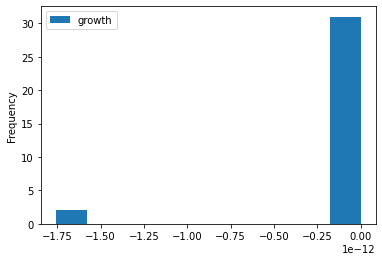

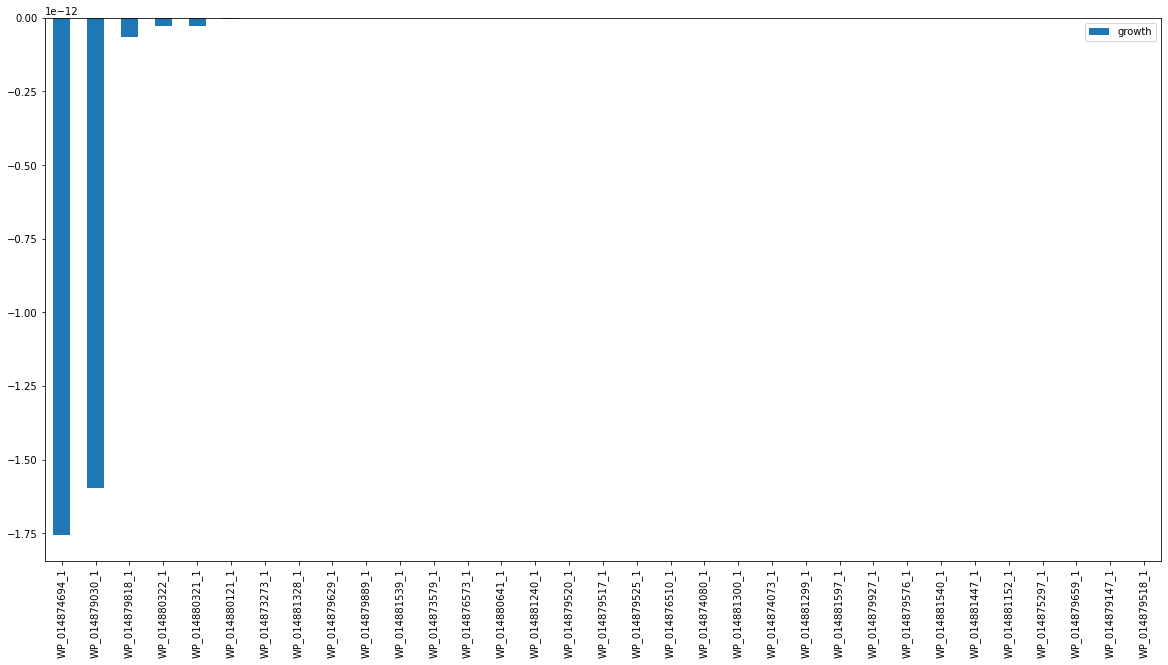

In [48]:
# histogram of the essential genes:

import pandas as pd

df = pd.DataFrame.from_dict(esn_gene, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')
df.plot.hist()

ax = df.plot.bar().axes
ax.figure.set_size_inches(20, 10)

In [49]:
#ADDITION OF PRODUCTION OF TDA INTO THE GSM AND SEEING THE POTENTIAL:
# change the medium to the condition silimar with literature.
with model:
    medium = model.medium
    medium['EX_glc__D_e']= 11.11
    medium['EX_pi_e'] = 0.15
    model.medium = medium
    print(medium)
    print("Objective function:",model.objective)
    maxgrowth = model.optimize().objective_value ##NB! Need CPLEX optimizer dependency!!!##
    print("Max growth rate:",maxgrowth)
    new_reaction = Reaction('TDAF') # acser_c + h2o_c + nad_c + pac_c + so4_c --> nadh_c + ppa_c + pyr_c + tda_c
    new_exchange_reaction = Reaction('EX_tda_e') # Exchange reaction for TDA
    tda = Metabolite(id='tda_c', name='tropodithietic acid', compartment='c')
    
    new_reaction.add_metabolites({model.metabolites.so4_c: -1,
                                  model.metabolites.acser_c: -1,
                                  model.metabolites.pac_c: -1,
                                  model.metabolites.nad_c: -1,
                                  model.metabolites.h2o_c: -1,
                                  tda: 1, 
                                  model.metabolites.nadh_c: 1,
                                  model.metabolites.ppa_c: 1,
                                  model.metabolites.pyr_c: 1,
                                 })
    new_exchange_reaction.add_metabolites({tda: -1
                                          })

    
    model.add_reactions([new_reaction])
    model.add_reactions([new_exchange_reaction])
    print(new_reaction.build_reaction_string())
    print(new_exchange_reaction.build_reaction_string())
    model.objective = model.reactions.EX_tda_e #change objective function to the TDA exchange reaction.
    max_tda = model.optimize().objective_value ##NB! Need CPLEX optimizer dependency!!!##
    print(max_tda)

{'EX_adn_e': 10.0, 'EX_ala__L_e': 10.0, 'EX_arg__L_e': 10.0, 'EX_aso3_e': 10.0, 'EX_asp__L_e': 10.0, 'EX_ca2_e': 10.0, 'EX_cl_e': 10.0, 'EX_cobalt2_e': 10.0, 'EX_cu2_e': 10.0, 'EX_cys__L_e': 10.0, 'EX_fe2_e': 10.0, 'EX_fe3_e': 10.0, 'EX_fol_e': 10.0, 'EX_glc__D_e': 11.11, 'EX_glu__L_e': 10.0, 'EX_gly_e': 10.0, 'EX_gsn_e': 10.0, 'EX_h2o_e': 10.0, 'EX_h2s_e': 10.0, 'EX_h_e': 10.0, 'EX_his__L_e': 10.0, 'EX_hxan_e': 10.0, 'EX_ile__L_e': 10.0, 'EX_k_e': 10.0, 'EX_leu__L_e': 10.0, 'EX_lys__L_e': 10.0, 'EX_met__L_e': 10.0, 'EX_mg2_e': 10.0, 'EX_mn2_e': 10.0, 'EX_mobd_e': 10.0, 'EX_nh4_e': 10.0, 'EX_o2_e': 10.0, 'EX_phe__L_e': 10.0, 'EX_pheme_e': 10.0, 'EX_pi_e': 0.15, 'EX_pro__L_e': 10.0, 'EX_ser__L_e': 10.0, 'EX_so4_e': 10.0, 'EX_thm_e': 10.0, 'EX_thr__L_e': 10.0, 'EX_trp__L_e': 10.0, 'EX_tyr__L_e': 10.0, 'EX_uri_e': 10.0, 'EX_val__L_e': 10.0, 'EX_zn2_e': 10.0}
Objective function: Maximize
1.0*Growth - 1.0*Growth_reverse_699ae
Max growth rate: 0.15211546983903795


NameError: name 'Reaction' is not defined

In [ ]:
#Keep 20% gowth and maximize PDA production:
with model:
    medium = model.medium
    medium['EX_glc__D_e']= 11.11
    medium['EX_pi_e'] = 0.15
    model.medium = medium
    print(medium)
    print("Objective function:",model.objective)
    maxgrowth = model.optimize().objective_value ##NB! Need CPLEX optimizer dependency!!!##
    print("Max growth rate:",maxgrowth)
    twentygrowth=maxgrowth*0.2
    print("20% growth=",twentygrowth)
    new_reaction = Reaction('TDAF') # acser_c + h2o_c + nad_c + pac_c + so4_c --> nadh_c + ppa_c + pyr_c + tda_c
    new_exchange_reaction = Reaction('EX_tda_e') # Exchange reaction for TDA
    tda = Metabolite(id='tda_c', name='tropodithietic acid', compartment='c')
    
    new_reaction.add_metabolites({model.metabolites.so4_c: -1,
                                  model.metabolites.acser_c: -1,
                                  model.metabolites.pac_c: -1,
                                  model.metabolites.nad_c: -1,
                                  model.metabolites.h2o_c: -1,
                                  tda: 1, 
                                  model.metabolites.nadh_c: 1,
                                  model.metabolites.ppa_c: 1,
                                  model.metabolites.pyr_c: 1,
                                 })
    new_exchange_reaction.add_metabolites({tda: -1
                                          })
    
    model.add_reactions([new_reaction])
    model.add_reactions([new_exchange_reaction])
    model.reactions.Growth.lower_bound = twentygrowth # change the growth rate to 20%.
    print(new_reaction.build_reaction_string())
    print(new_exchange_reaction.build_reaction_string())
    model.objective = model.reactions.EX_tda_e #change objective function to the TDA exchange reaction.
    reasonable_tda = model.optimize().objective_value ##NB! Need CPLEX optimizer dependency!!!##
    print(reasonable_tda)

In [ ]:
###TESTING GSM MODEL AGAINST DATA FROM LITERATURE：
#Calculating experimental growth rate

import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np

In [ ]:
data_bio = pd.read_csv("data_bio.csv")
print(data_bio)

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
data_bio.plot(x='Time (h)', style='.-');
#important to have the x-variable first.
#keep in mind the order because the answers are shown in the same order

In [ ]:
#the exponential fit growth for biomass is:        f=a* exp(mu_max * t)
#a is biomass concentration at t0
#mu is mu_max, maximum biomass growth rate

f= lambda t,a,mu: a*np.exp(mu*t)

exponentialtime= data_bio.loc[11:17, 'Time (h)']


In [ ]:
exponentialbiomass= [0.19,0.24,0.28,0.33,0.42,0.51,0.6]

popt,pcof=curve_fit(f, exponentialtime, exponentialbiomass)

In [ ]:
#popt contains a and mu, pcof is the covariance

#a=0.008 and mu=0.237 because of the order stablished before

x0=popt[0]

mu=popt[1]

print('Growth rate : ',mu,'(h-1)') 